In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import metrics
from StrongCNN.utils import features_selection as fs
%matplotlib inline

In [2]:
def myLogFormat(y,pos):
    # Find the number of decimal places required
    decimalplaces = int(np.maximum(-np.log10(y),0))     # =0 for numbers >=1
    # Insert that number into a format string
    formatstring = '{{:.{:1d}f}}'.format(decimalplaces)
    # Return the formatted tick label
    return formatstring.format(y)

In [3]:
Creg_files = {
'HST':'/home/babyostrich/Documents/Repos/StrongCNN/data/control_data/HSTlikeModels/BCG/score_auc_C.txt',
'LSST-best':'/home/babyostrich/Documents/Repos/StrongCNN/data/control_data/LSSTlikeModels/single/BCG/score_auc_C.txt',
'LSST10':'/home/babyostrich/Documents/Repos/StrongCNN/data/control_data/LSSTlikeModels/stack/BCG/score_auc_C.txt',
'nHST':'/home/babyostrich/Documents/Repos/StrongCNN/data/control_data/HSTlikeModels/noBCG/score_auc_C.txt',
'nLSST-best':'/home/babyostrich/Documents/Repos/StrongCNN/data/control_data/LSSTlikeModels/single/noBCG/score_auc_C.txt',
'nLSST10':'/home/babyostrich/Documents/Repos/StrongCNN/data/control_data/LSSTlikeModels/stack/noBCG/score_auc_C.txt',

}
Creg_data = {}
for k, v in Creg_files.iteritems() :
    Creg_data[k] = pd.read_csv(v,delimiter=' ')

In [9]:
def plot_Creg(data_key,legend=False, save=False) :
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()

    ax1.semilogx(Creg_data[data_key]['C_logreg'], Creg_data[data_key]['train_AUC'],'b:',lw=5.0,label='train')
    ax1.semilogx(Creg_data[data_key]['C_logreg'], Creg_data[data_key]['test_AUC'],'b',lw=5.0,label='test')
    ax2.loglog(Creg_data[data_key]['C_logreg'],Creg_data[data_key]['train_time'],'r',lw=1.0,label='train time')
    ax2.set_ylim((.5*Creg_data[data_key]['train_time'].min(),2*Creg_data[data_key]['train_time'].max()))
    plt.text(0.1,0.9,data_key, ha='left', va='center', transform=plt.gca().transAxes,fontsize='xx-large')
    ax1.set_xlabel('Logistic Regression Coefficient',fontsize='xx-large')
    ax1.set_ylabel('Area Under ROC Curve',fontsize='xx-large',color='blue')
    ax2.set_ylabel('Train Time (sec)',fontsize='xx-large',color='r')

    plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(myLogFormat))
    plt.gca().tick_params(axis='x', labelsize='x-large')
    plt.gca().tick_params(axis='y', labelsize='x-large')
    if legend :
        leg = ax1.legend(loc='lower right',fontsize='x-large',frameon=False)
        # change the font colors to match the line colors:
        for line,text in zip(leg.get_lines(), leg.get_texts()):
            text.set_color(line.get_color())
    if save :  
        plt.savefig('paper_figures/Creg/'+data_key+'.pdf',bbox_inches="tight")
    #plt.close()
    

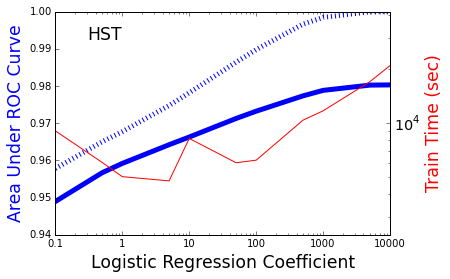

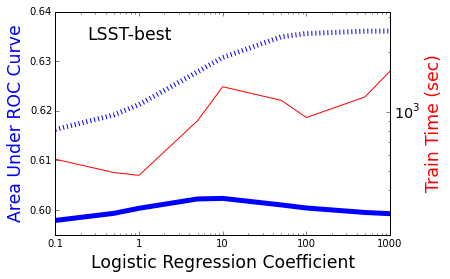

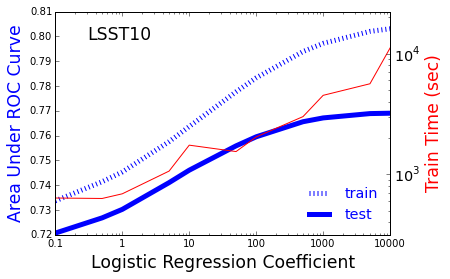

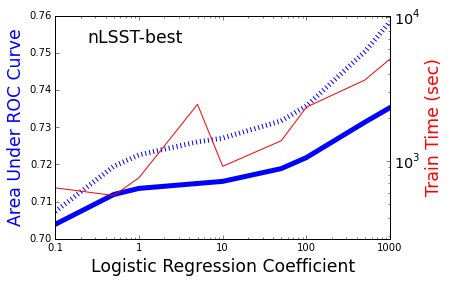

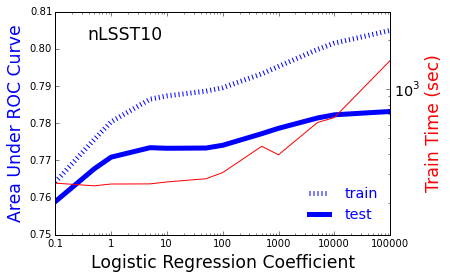

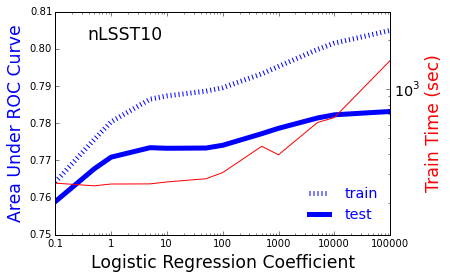

In [10]:
plot_Creg('HST',save=True)
plot_Creg('LSST-best',save=True)
plot_Creg('LSST10',save=True,legend=True)
#plot_Creg('nHST',save=True)
plot_Creg('nLSST-best',save=True)
plot_Creg('nLSST10',save=True,legend=True)
plot_Creg('nLSST10',save=False,legend=True)


In [30]:
trainsize_files = {
    #'HST':'/home/babyostrich/Documents/Repos/StrongCNN/data/control_data/HSTlikeModels/BCG/trainsize_AUC_time.txt',
    'LSST-best':'/home/babyostrich/Documents/Repos/StrongCNN/data/control_data/LSSTlikeModels/single/BCG/trainsize_AUC_time.txt',
    'LSST10':'/home/babyostrich/Documents/Repos/StrongCNN/data/control_data/LSSTlikeModels/stack/BCG/trainsize_AUC_time.txt',
    #'nHST':'/home/babyostrich/Documents/Repos/StrongCNN/data/control_data/HSTlikeModels/noBCG/trainsize_AUC_time.txt',
    'nLSST-best':'/home/babyostrich/Documents/Repos/StrongCNN/data/control_data/LSSTlikeModels/single/noBCG/trainsize_AUC_time.txt',
    'nLSST10':'/home/babyostrich/Documents/Repos/StrongCNN/data/control_data/LSSTlikeModels/stack/noBCG/trainsize_AUC_time.txt',

}
trainsize_data = {}
for k, v in trainsize_files.iteritems() :
    trainsize_data[k] = pd.read_csv(v,delimiter=' ')

In [7]:
def plot_nolens_lens_trainsize_auc( data_keys, legend=True, save=True ) :
    fig, ax1 = plt.subplots()
    #ax1.text(0.1,0.9, data_key, ha='left', va='center', transform=ax1.transAxes,fontsize='xx-large')
    for data_key,color in zip(data_keys,['r','b']) :
        ax1.plot(trainsize_data[data_key]['train_size'], trainsize_data[data_key]['AUC'], color,marker='o',ms=8,lw=5.0,label=data_key)
        ax1.plot(trainsize_data['n'+data_key]['train_size'], trainsize_data['n'+data_key]['AUC'], color+'--',marker='o',ms=8,lw=5.0,label='n'+data_key)
    
    ax1.set_xlabel('Train Size',fontsize='xx-large')
    ax1.set_ylabel('Area Under ROC Curve',fontsize='xx-large')
    ax1.grid()
    ax1.set_xscale('log')
    ax1.set_xlim((500,12000))
    ax1.tick_params(axis='x', labelsize='x-large')
    ax1.tick_params(axis='y', labelsize='x-large')
        
    if legend :
        leg = plt.legend(loc='center right',fontsize='x-large',frameon=False)
        # change the font colors to match the line colors:
        for line,text in zip(leg.get_lines(), leg.get_texts()):
            text.set_color(line.get_color())
    if save :  
        print 'saving: '+'paper_figures/trainsize/combined_'+data_key+'_with_n'+data_key+'.pdf'
        
        plt.savefig('paper_figures/trainsize/combined_'+data_key+'_with_n'+data_key+'.pdf',bbox_inches="tight")
        plt.close()     

In [31]:
plot_nolens_lens_trainsize_auc(['LSST-best','LSST10'], legend=True, save=True)
#plot_nolens_lens_trainsize_auc('LSST1', legend=True, save=True)
                                

saving: paper_figures/trainsize/combined_LSST10_with_nLSST10.pdf


In [9]:
def plot_trainsize_time(data_key,legend=False,save=False) :
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.text(0.1,0.9, data_key, ha='left', va='center', transform=ax1.transAxes,fontsize='xx-large')

    ax1.plot(trainsize_data[data_key]['train_size'], trainsize_data[data_key]['train_time'], 'bo-',lw=5.0,label=data_key)
    ax1.plot(trainsize_data['n'+data_key]['train_size'], trainsize_data['n'+data_key]['train_time'], 'bo--',lw=5.0,label="n"+data_key)
    ax2.plot(trainsize_data[data_key]['train_size'], trainsize_data[data_key]['Creg'], 'ro-',lw=2.0,label=data_key)
    ax2.plot(trainsize_data['n'+data_key]['train_size'], trainsize_data['n'+data_key]['Creg'], 'ro--',lw=2.0,label="n"+data_key)
    
    
    ax1.set_xlabel('Train Size',fontsize='xx-large')
    ax1.set_ylabel('Train Time',fontsize='xx-large',color='b')
    ax2.set_ylabel('Optimal C$_{\\rm{LogReg}}$',fontsize='xx-large',color='r')

    ax1.set_xscale('log')
    ax2.set_xscale('log')
    ax1.set_yscale('log')
    ax2.set_yscale('log')
    
    ax1.set_xlim((500,12000))
    ax2.set_xlim((500,12000))
    ax1.tick_params(axis='x', labelsize='x-large')
    ax2.tick_params(axis='y', labelsize='x-large')
    ax1.tick_params(axis='y', labelsize='x-large')
    if legend :
        leg = plt.legend(loc='lower right',fontsize='x-large',frameon=False)
        # change the font colors to match the line colors:
        #for line,text in zip(leg.get_lines(), leg.get_texts()):
            #text.set_color(line.get_color())
    if save :  
        print 'saving: '+'paper_figures/traintime/'+data_key+'.pdf'
        plt.grid()
        plt.savefig('paper_figures/traintime/'+data_key+'.pdf',bbox_inches="tight")
        plt.close()

In [32]:
#plot_trainsize_time('HST',save=True)
plot_trainsize_time('LSST-best',save=True, legend=True)
plot_trainsize_time('LSST10',save='LSST10',legend=True)


saving: paper_figures/traintime/LSST-best.pdf
saving: paper_figures/traintime/LSST10.pdf


In [11]:
def set_axis_style(ax, labels):
    ax.get_xaxis().set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels,fontsize='x-large',rotation='vertical')
    ax.set_xlim(0.25, len(labels) + 0.75)
    #ax.set_xlabel('Data Set',fontsize='xx-large')

def plot_rotated_aucs(data_keys, save=False) :
    fig, ax1 = plt.subplots()
    inds = np.arange(1, len(data_keys) + 1)
    for i, k in enumerate(data_keys) :
        if i == 0 : (l1,lavg) = ("Scored for 1 rot", "Scored avg over 4 rot")
        else : (l1, lavg) = (None, None)
        ax1.plot([inds[i]], [rotated_aucs_data[k][0][0]], marker='*', color='r', ms=12, mec='r', lw=0.001, label=lavg)    
        ax1.plot([inds[i]]*(len(rotated_aucs_data[k][0])-1), rotated_aucs_data[k][0][1:], marker='o', color='b', mec='b', lw=0.001,ms=7, label=l1)
    ax1.set_ylabel('Area Under ROC Curve',fontsize='xx-large')
    set_axis_style(ax1, data_keys)
    ax1.legend()
    leg = ax1.legend(loc='best',fontsize='x-large',frameon=True, numpoints=1, scatterpoints=1)
    # change the font colors to match the line colors:
    for line,text in zip(leg.get_lines(), leg.get_texts()):
        text.set_color(line.get_color())
    plt.grid()
    plt.savefig('paper_figures/rotated_aucs/rotated_aucs.pdf',bbox_inches="tight")
    
    

In [33]:
rotated_aucs_files = {
'HST':'/home/babyostrich/Documents/Repos/StrongCNN/data/control_data/HSTlikeModels/BCG/rotated_aucs_test.txt',
'LSST-best':'/home/babyostrich/Documents/Repos/StrongCNN/data/control_data/LSSTlikeModels/single/BCG/rotated_aucs_test.txt',
'LSST10':'/home/babyostrich/Documents/Repos/StrongCNN/data/control_data/LSSTlikeModels/stack/BCG/rotated_aucs_test.txt',
'nHST':'/home/babyostrich/Documents/Repos/StrongCNN/data/control_data/HSTlikeModels/noBCG/rotated_aucs_test.txt',
'nLSST-best':'/home/babyostrich/Documents/Repos/StrongCNN/data/control_data/LSSTlikeModels/single/noBCG/rotated_aucs_test.txt',
'nLSST10':'/home/babyostrich/Documents/Repos/StrongCNN/data/control_data/LSSTlikeModels/stack/noBCG/rotated_aucs_test.txt'

}
rotated_aucs_data = {}
for k, v in rotated_aucs_files.iteritems() :
    rotated_aucs_data[k] = pd.read_csv(v,delimiter=' ',header=None)

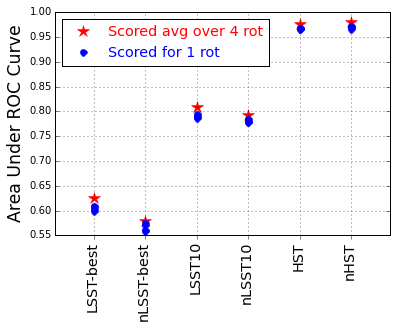

In [34]:
plot_rotated_aucs(['LSST-best','nLSST-best','LSST10','nLSST10','HST','nHST'])

In [35]:
metric_files= {
    'HST':'/home/babyostrich/Documents/Repos/StrongCNN/data/control_data/HSTlikeModels/BCG/print_all_scores_for_debugging_test.txt',
    'nHST':'/home/babyostrich/Documents/Repos/StrongCNN/data/control_data/HSTlikeModels/noBCG/print_all_scores_for_debugging_test.txt',
    'LSST-best':'/home/babyostrich/Documents/Repos/StrongCNN/data/control_data/LSSTlikeModels/single/BCG/print_all_scores_for_debugging_test.txt',
    'nLSST-best':'/home/babyostrich/Documents/Repos/StrongCNN/data/control_data/LSSTlikeModels/single/noBCG/print_all_scores_for_debugging_test.txt',
    'LSST10':'/home/babyostrich/Documents/Repos/StrongCNN/data/control_data/LSSTlikeModels/stack/BCG/print_all_scores_for_debugging_test.txt',
    'nLSST10':'/home/babyostrich/Documents/Repos/StrongCNN/data/control_data/LSSTlikeModels/stack/noBCG/print_all_scores_for_debugging_test.txt',
    
}
metric_data = {}
for k, v in metric_files.iteritems() :
    metric_data[k] = pd.read_csv(v,delimiter=' ') 
    metric_data[k].sort('avgscores',inplace=True)
    fpr,tpr = fs._calc_tpr_fpr(metric_data[k]['avgscores'][:], metric_data[k]['label'][:])
    metric_data[k]['tpr'] = tpr
    metric_data[k]['fpr'] = fpr

In [15]:
def plot_ROC(data_keys, colors_ls, savefig=None, legend=True) : 
    for dk, c in zip(data_keys,colors_ls) :
        fpr, tpr, thresh = metrics.roc_curve(metric_data[dk]['label'], metric_data[dk]['avgscores'],pos_label=1)
        auc = metrics.roc_auc_score(metric_data[dk]['label'], metric_data[dk]['avgscores'])
        
        precision, recall, thresh = metrics.precision_recall_curve(metric_data[dk]['label'], metric_data[dk]['avgscores'],pos_label=1)
        #plt.plot(fpr, tpr, c, lw=5.,label=dk+' auc=%.2f'%auc)
        plt.plot(metric_data[dk]['fpr'], metric_data[dk]['tpr'], c, lw=5.,label=dk+' auc=%.3f'%auc)
        plt.plot((0,1),(0,1),'k--')
        plt.xlabel('False Positive Rate',fontsize='xx-large')
        plt.ylabel('True Positive Rate',fontsize='xx-large')
        
        plt.gca().tick_params(axis='x', labelsize='x-large')
        plt.gca().tick_params(axis='y', labelsize='x-large')

    if legend :
        leg = plt.legend(loc='lower right',fontsize='large',frameon=False)
        # change the font colors to match the line colors:
        for line,text in zip(leg.get_lines(), leg.get_texts()):
            text.set_color(line.get_color())
    if savefig != None :
        plt.grid()
        plt.savefig('paper_figures/metrics/ROC/'+savefig+'.pdf',bbox_inches="tight")

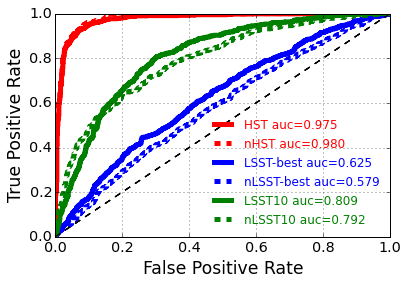

In [36]:
plot_ROC(['HST','nHST','LSST-best','nLSST-best','LSST10','nLSST10'],['r','r--','b','b--','g','g--'],savefig='ROC_compilation')

In [17]:
def plot_precision_recall(data_keys, colors_ls, savefig=None, legend=True) :
    for dk, c in zip(data_keys,colors_ls) :
        precision, recall, thresh = metrics.precision_recall_curve(metric_data[dk]['label'], metric_data[dk]['avgscores'],pos_label=1)
        plt.plot(recall, precision, c, lw=4.,label=dk)
    plt.xlabel('Recall (Completeness)',fontsize='xx-large')
    plt.ylabel('Precision (Purity)',fontsize='xx-large')
        
    plt.gca().tick_params(axis='x', labelsize='x-large')
    plt.gca().tick_params(axis='y', labelsize='x-large')

    plt.grid()
    plt.xlim(0,1)
    if legend :
        leg = plt.legend(loc='lower left',fontsize='large',frameon=False)
        # change the font colors to match the line colors:
        for line,text in zip(leg.get_lines(), leg.get_texts()):
            text.set_color(line.get_color())
    if savefig != None :
        plt.savefig('paper_figures/metrics/PR/'+savefig+'.pdf',bbox_inches="tight")    

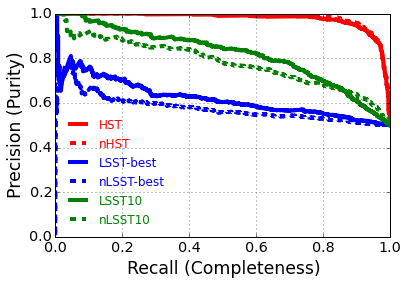

In [37]:
plot_precision_recall(['HST','nHST','LSST-best','nLSST-best','LSST10','nLSST10'],['r','r--','b','b--','g','g--'],savefig='PR_compilation')

In [19]:
def get_ROC_samples(data_key,borderline_tpr_range=None) :
    sorted_data = metric_data[data_key].sort('avgscores')
    sorted_lens = sorted_data.loc[sorted_data['label'] == 1]
    sorted_nonlens = sorted_data.loc[sorted_data['label'] == 0]
    
    borderline_nonlens_min = sorted_nonlens.loc[sorted_nonlens['tpr']<borderline_tpr_range[1]] 
    borderline_nonlens = borderline_nonlens_min.loc[borderline_nonlens_min['tpr']>borderline_tpr_range[0]]
    borderline_lens_min = sorted_lens.loc[sorted_lens['tpr']<borderline_tpr_range[1]] 
    borderline_lens = borderline_lens_min.loc[borderline_lens_min['tpr']>borderline_tpr_range[0]] 
    
    return {'tp': sorted_lens[-20:],
           'fp': sorted_nonlens[-20:],
            'bp': borderline_lens,
            'bn': borderline_nonlens,
            'fn':sorted_lens[:20],
            'tn':sorted_nonlens[:20],
           }

In [20]:
ROC_samples = {}
ROC_samples['LSST10'] = get_ROC_samples('LSST10',borderline_tpr_range=(0.78,0.8) )
ROC_samples["LSST10"]

{'bn':        IDs  label  avgscores    score0    score1    score2    score3    tpr  \
 211   1188      0   0.466607  0.414649  0.447716  0.469970  0.534094  0.781   
 949   1852      0   0.466922  0.329979  0.622395  0.365537  0.549779  0.782   
 1023  1919      0   0.467467  0.471113  0.441819  0.404160  0.552775  0.783   
 738   1662      0   0.467721  0.577941  0.424227  0.427533  0.441182  0.784   
 228   1202      0   0.467867  0.594365  0.356105  0.495520  0.425478  0.785   
 112   1099      0   0.468043  0.679444  0.366476  0.437028  0.389224  0.786   
 1016  1912      0   0.468407  0.440817  0.385165  0.585401  0.462245  0.787   
 899   1807      0   0.469071  0.346982  0.549304  0.606930  0.373069  0.788   
 630   1565      0   0.469438  0.493639  0.446307  0.311340  0.626466  0.789   
 164   1145      0   0.470000  0.421679  0.566591  0.391761  0.499969  0.790   
 338   1301      0   0.471564  0.538281  0.542397  0.410749  0.394829  0.791   
 633   1568      0   0.472065  0.4

In [21]:
def print_relevant_ROC_identifiers( data_key, ROC_region ) :
    print data_key, ROC_region
    print_str = ''
    for i in ROC_samples[data_key][ROC_region]['IDs'][:4] : print_str+=str(i)+','
    print print_str[:-1]
    print_str = ''
    for i in ROC_samples[data_key][ROC_region]['avgscores'][:4] : print_str+=str(i)+' '
    print print_str

In [22]:
print_relevant_ROC_identifiers('LSST10','tp')
print_relevant_ROC_identifiers('LSST10','fp')
print_relevant_ROC_identifiers('LSST10','bp')
print_relevant_ROC_identifiers('LSST10','bn')
print_relevant_ROC_identifiers('LSST10','fn')
print_relevant_ROC_identifiers('LSST10','tn')

LSST10 tp
840,119,427,939
0.998765847743 0.998846728 0.999068322456 0.999110818251 
LSST10 fp
1530,1592,1885,1760
0.84549915204 0.85305320065 0.85350637025 0.853671372684 
LSST10 bp
306,777,753,101
0.46870530545 0.469794138215 0.470777481305 0.470788648267 
LSST10 bn
1188,1852,1919,1662
0.466607435224 0.466922407936 0.46746689584 0.467720773946 
LSST10 fn
50,570,877,493
0.0669018108657 0.100376596908 0.105024656761 0.114386215568 
LSST10 tn
1361,1941,1727,1509
0.0653693055153 0.0674157632027 0.0856030885577 0.0883207040728 


In [51]:
lens_param_files= {
    'HST':'/home/babyostrich/Documents/Repos/StrongCNN/data/control_data/HSTlikeModels/BCG/id_lensparam_test.txt',
              'nHST':'/home/babyostrich/Documents/Repos/StrongCNN/data/control_data/HSTlikeModels/noBCG/id_lensparam_test.txt',       #'LSST1':'/home/babyostrich/Documents/Repos/StrongCNN/data/control_data/LSSTlikeModels/single/BCG/id_lensparam_test.txt',
    'LSST-best':'/home/babyostrich/Documents/Repos/StrongCNN/data/control_data/LSSTlikeModels/single/BCG/id_lensparam_test.txt',
    'nLSST-best':'/home/babyostrich/Documents/Repos/StrongCNN/data/control_data/LSSTlikeModels/single/noBCG/id_lensparam_test.txt',
    'LSST10':'/home/babyostrich/Documents/Repos/StrongCNN/data/control_data/LSSTlikeModels/stack/BCG/id_lensparam_test.txt',
    'nLSST10':'/home/babyostrich/Documents/Repos/StrongCNN/data/control_data/LSSTlikeModels/stack/noBCG/id_lensparam_test.txt',
    
}
lens_param_data = {}
for k, v in lens_param_files.iteritems() :
    lens_param_data[k] = pd.read_csv(v,delimiter=' ') 
   


In [39]:
from matplotlib import cm

def create_colorbar(cmap, minimum, maximum) :
    # Using contourf to provide my colorbar info, then clearing the figure                                                                            
    Z = [[0,0],[0,0]]
    step=(maximum-minimum)/1000.
    levels = np.arange(minimum, maximum,step)
    CS3 = plt.contourf(Z, levels, cmap=cmap)
    plt.clf()
    return CS3

cmap = plt.get_cmap('hot_r')

def get_color(color_array) :
    normalized_color_array = (color_array - color_array.min() ) / (color_array.max()-color_array.min())
    return normalized_color_array

def plot_lens_param(data_key, xaxis_label, color_label,yaxis_label='avgscores',class_label=1,make_colorbar=True) :
    lens_param_subdata = lens_param_data[data_key][lens_param_data[data_key]['label'] == class_label ]
    xdata = lens_param_subdata[xaxis_label]
    ydata = lens_param_subdata[yaxis_label]
    cdata = lens_param_subdata[color_label]
    CS3 = create_colorbar(cmap, cdata.min(), cdata.max())
    if make_colorbar :
        plt.scatter( xdata, ydata,
                    color = cmap(get_color(cdata)),
                            marker='*',cmap=cmap)
    else :
        plt.scatter( xdata, ydata,
                    color = 'b',
                            marker='*')
    plt.xlabel(xaxis_label.replace('_',' '),fontsize='xx-large')
    plt.ylabel('Score',fontsize='xx-large')
    plt.ylim(0,1.1)
    print xdata.max()
    plt.xlim(xdata.min(),xdata.max()+(xdata.max()-xdata.min())*.1)
    #plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(myLogFormat))
    if make_colorbar : plt.colorbar(CS3)
    plt.text(0.7,0.1,data_key, ha='left', va='center', transform=plt.gca().transAxes,fontsize='xx-large')
    plt.grid()
    plt.savefig('paper_figures/lens_parameter_dependence/'+data_key+'_'+xaxis_label+'_'+color_label+'.pdf')
   
            

30.8120063191
30.8120063191
30.8120063191


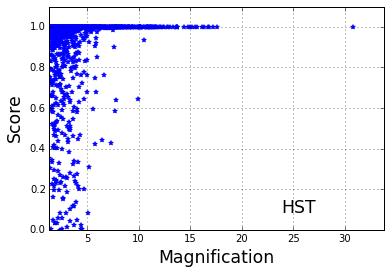

In [43]:
plot_lens_param('LSST10','Magnification','z',class_label=1,make_colorbar=False)
plot_lens_param('LSST-best','Magnification','z',class_label=1,make_colorbar=False)
plot_lens_param('HST','Magnification','z',class_label=1,make_colorbar=False)

In [60]:
from calculate_ThetaE import calculate_ThetaE
def lens_param_add_ThetaE(data_key) :
    lens_param_data[data_key]['Einstein_Radius'] = calculate_ThetaE(
        lens_param_data[data_key]['Velocity_Dispersion'],
        lens_param_data[data_key]['z'],
        2.0
        )

In [62]:
for k, v in lens_param_data.iteritems() : lens_param_add_ThetaE(k)

2.6122412035


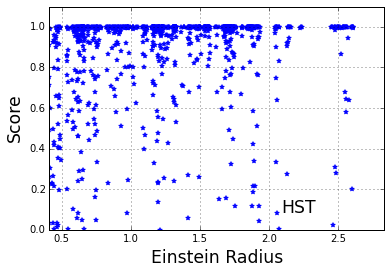

In [63]:
plot_lens_param('HST','Einstein_Radius','z',class_label=1,make_colorbar=False)

2.6122412035


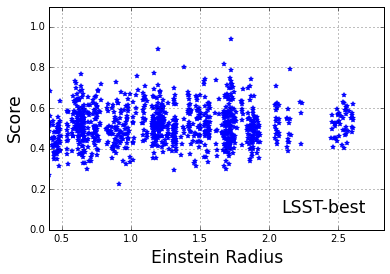

In [64]:
plot_lens_param('LSST-best','Einstein_Radius','z',class_label=1,make_colorbar=False)

2.6122412035


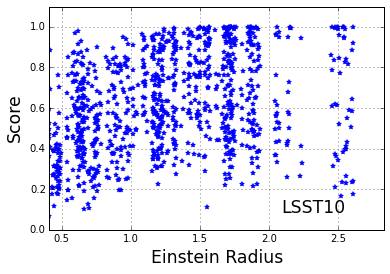

In [65]:
plot_lens_param('LSST10','Einstein_Radius','z',class_label=1,make_colorbar=False)